In [2]:
from log import analyse
from ui import get_event_counts
from column_names import *
from errors import *
from modes import *
import pandas as pd

In [3]:
data = analyse("./data/Olomouc_Unicov.xlsx")

In [4]:
datasets = {
        TR_EVENT: data[(data[MODE]==TR) & (data[PREV_MODE]!=data[MODE])],
        ILLEGAL_SR_EVENT: data[data[ILLEGAL_SR]],
        CONNECTION_LOSS_EVENT: data[data[CONNECTION_LOSS]]
    }
counts = get_event_counts(datasets[TR_EVENT])

In [104]:
counts.T

Datum       2023-01-01       2023-01-02             2023-01-05 2023-01-06  \
Číslo vlaku      3636  3688       1438  3634  13723      13711      3682    
Počet                1     1          1     1     1          1          1   

Datum       2023-01-11       2023-01-12  ... 2023-01-19              \
Číslo vlaku      3623  13708      3687   ...      3630  3632  3639    
Počet                1     1          1  ...          1     1     1   

Datum       2023-01-20 2023-01-21 2023-01-22 2023-01-23       2023-01-24        
Číslo vlaku      13703      3628       13716      1439  3622       3640  13711  
Počet                1          1          2          1     1          1     1  

[1 rows x 21 columns]

In [67]:
x = counts.reset_index()

In [91]:
x["group"] = (x["Datum"].diff().dt.days != 0).cumsum()

In [92]:
x["new_group"] = (x["Datum"].diff().dt.days != 0).astype(int)

In [97]:
x["position_in_group"] = x.groupby("group").cumcount() + 1

In [99]:
x["total_position"] = (x["new_group"] + 1).cumsum() - 2

In [103]:
x.set_index(["Datum", "Číslo vlaku"]).T

Datum             2023-01-01       2023-01-02             2023-01-05  \
Číslo vlaku            3636  3688       1438  3634  13723      13711   
Počet                      1     1          1     1     1          1   
group                      1     1          2     2     2          3   
new_group                  1     0          1     0     0          1   
position_in_group          1     2          1     2     3          1   
total_position             0     1          3     4     5          7   

Datum             2023-01-06 2023-01-11       2023-01-12  ... 2023-01-19  \
Číslo vlaku            3682       3623  13708      3687   ...      3630    
Počet                      1          1     1          1  ...          1   
group                      4          5     5          6  ...          8   
new_group                  1          1     0          1  ...          1   
position_in_group          1          1     2          1  ...          1   
total_position             9         11    12         14  ...         18   

Datum                         2023-01-20 2023-01-21 2023-01-22 2023-01-23  \
Číslo vlaku       3632  3639       13703      3628       13716      1439    
Počet                 1     1          1          1          2          1   
group                 8     8          9         10         11         12   
new_group             0     0          1          1          1          1   
position_in_group     2     3          1          1          1          1   
total_position       19    20         22         24         26         28   

Datum                   2023-01-24        
Číslo vlaku       3622       3640  13711  
Počet                 1          1     1  
group                12         13    13  
new_group             0          1     0  
position_in_group     2          1     2  
total_position       29         31    32  

[5 rows x 21 columns]

In [105]:
x.groupby("group").sum("Počet").drop(["Číslo vlaku", "position_in_group"], axis="columns").T

group,1,2,3,4,5,6,7,8,9,10,11,12,13
Počet,2,3,1,1,2,1,1,3,1,1,2,2,2
new_group,1,1,1,1,1,1,1,1,1,1,1,1,1
total_position,1,12,7,9,23,14,16,57,22,24,26,57,63


In [106]:
import matplotlib.pyplot as plt

In [124]:
from ipyfilechooser import FileChooser

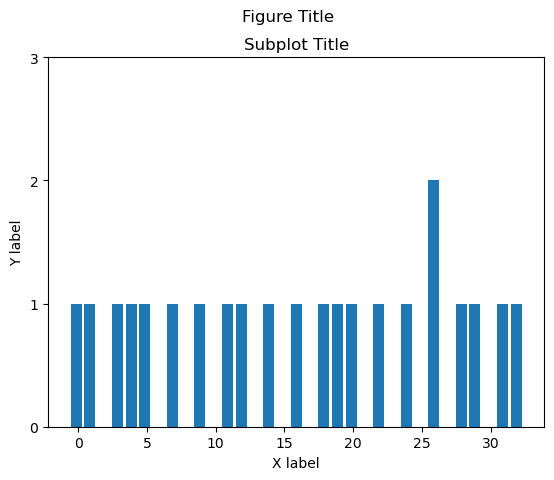

In [144]:
fig, ax = plt.subplots()
width = 0.3
fig.suptitle("Figure Title")
ax.set_title("Subplot Title")
ax.set_xlabel("X label")
ax.set_ylabel("Y label")
# ax.set_xticks([])
ax.set_yticks([0,1,2,3,4,5])
ax.set_ylim([0, x["Počet"].max() + 1])
rects = ax.bar(x["total_position"]-width/2, x["Počet"])

In [149]:
x = counts.reset_index()
x.T

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Datum,2023-01-01,2023-01-01,2023-01-02,2023-01-02,2023-01-02,2023-01-05,2023-01-06,2023-01-11,2023-01-11,2023-01-12,...,2023-01-19,2023-01-19,2023-01-19,2023-01-20,2023-01-21,2023-01-22,2023-01-23,2023-01-23,2023-01-24,2023-01-24
Číslo vlaku,3636,3688,1438,3634,13723,13711,3682,3623,13708,3687,...,3630,3632,3639,13703,3628,13716,1439,3622,3640,13711
Počet,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1


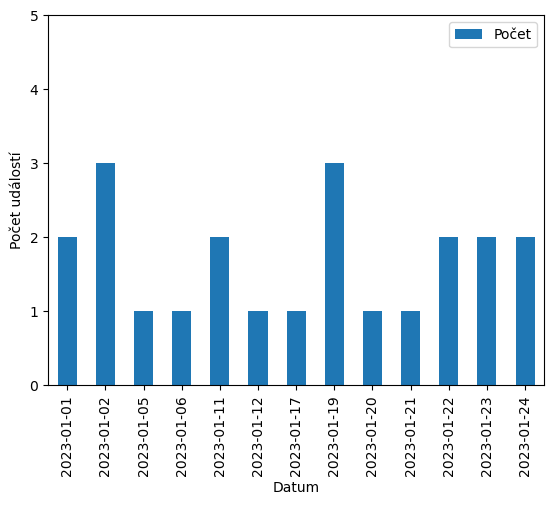

In [165]:
ax = x.groupby("Datum").sum("Počet").drop("Číslo vlaku", axis="columns").plot.bar()
ax.set_yticks([0,1,2,3,4,5])
ax.set_ylabel("Počet událostí");

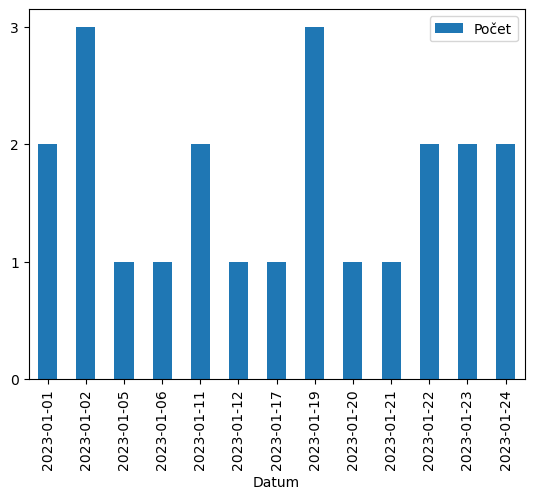

In [173]:
from matplotlib.ticker import MaxNLocator
ax = counts.groupby("Datum").sum().plot.bar()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [175]:
x = x.set_index(["Datum", "Číslo vlaku"])

In [181]:
def highlight_cols(s):
    color = 'grey'
    return 'background-color: %s' % color

In [186]:
x.T.style.applymap(highlight_cols, subset=pd.IndexSlice[:, x.T.columns[::2]])

In [197]:
s = x.T.style

s.applymap_index(lambda v: "border-style: solid; border-width:thin", axis="columns")
s.applymap_index(lambda v: "border-style: solid; border-width:thin", axis="index")

In [196]:
x

Počet
Datum      Číslo vlaku       
2023-01-01 3636             1
           3688             1
2023-01-02 1438             1
           3634             1
           13723            1
2023-01-05 13711            1
2023-01-06 3682             1
2023-01-11 3623             1
           13708            1
2023-01-12 3687             1
2023-01-17 1438             1
2023-01-19 3630             1
           3632             1
           3639             1
2023-01-20 13703            1
2023-01-21 3628             1
2023-01-22 13716            2
2023-01-23 1439             1
           3622             1
2023-01-24 3640             1
           13711            1